In [56]:
%matplotlib inline
import numpy as np
import types
import matplotlib.pyplot as plt

In [2]:
# deduction brackets
# start end amount
olajsave = [[0, 11166.37, 6519.82],
           [11166.37, 13316.83, 'linear'],
           [13316.83, np.inf, 3302.70]]

for i, olajsava in enumerate(olajsave):
    if olajsava[-1] =='linear':
        k = (olajsave[i+1][2] - olajsave[i-1][2]) / (olajsave[i][1] - olajsave[i][0])
        n = olajsave[i-1][2] - k * olajsave[i][0]
        a = lambda x: k * x + n 
        olajsave[i][2] = a

deductions = olajsave

In [47]:
# based on full income determine the tax deduction
# tax_basis = full income - social contributions
# tax_basis -= tax deduction(full_income)
# determing the tax rate starting at the lowest bracket

def tax_deduction(total_income, deductions):
    total_income = np.array(total_income, ndmin=1)
    return_arr = np.zeros(len(total_income))
    for j, income in enumerate(total_income):
        for i, deduction in enumerate(deductions):
            if (income > deduction[0]) and (income <= deduction[1]):
                if type(deduction[2]) == types.FunctionType:
                    return_arr[j] = deduction[2](income)
                else:
                    return_arr[j] = deduction[2]
    return return_arr


def social_contributions(total_income, contribution_rate):
    return (1 - contribution_rate) * total_income


def tax_rate(tax_basis, rates, brackets):
    out_arr = np.zeros(len(tax_basis))
    brackets = [[brackets[i], brackets[i+1], rates[i]] for i in range(len(rates)-1)]
    for i, bracket in enumerate(brackets):
        summ = 0
        for j in range(i):
            summ += (brackets[j][1] - brackets[j][0]) * brackets[j][2]
        bracket.append(summ)
    
    print(rates)
    print(brackets)
    plt.plot(tax_basis)
    
    for j, basis in enumerate(tax_basis):
        for i, bracket in enumerate(brackets):
            if (basis > bracket[0]) and (basis <= bracket[1]):
                out_arr[j] = (basis - bracket[0]) * bracket[2] + bracket[3]
                break
    return out_arr

def calculate_everything(total_income, deductions, contribution_rate, rates, brackets):
    total_income = np.array(total_income, ndmin=1)
    deduction = tax_deduction(yearly_salary, deductions)
    tax_base = social_contributions(total_income, contribution_rate)
    tax_base = np.max(np.c_[tax_base - deduction, np.zeros(len(tax_base))], axis=1)
    taxes = tax_rate(tax_base, rates, brackets)
    
#     taxes = tax_rate(yearly_salary, rates, brackets)
    print("total_income, tax_base, taxes, tax_base-taxes")
    return np.c_[total_income, tax_base, taxes, tax_base-taxes]
    

def dohodnina(gross_value, social_contributions, tax_brackets, tax_breaks):
    gross_value = np.array(gross_value, dtype=np.float)
    gross_social = gross_value * (1 - social_contributions)

    # tax breaks only depend on the gross income
    for tax_break in tax_breaks:
        mask = (gross_value > tax_break[0]) & (gross_value <= tax_break[1])
        if type(mask) == np.bool_:
            if mask:
                gross_social -= tax_break[2]
        else:
            gross_social[mask] -= tax_break[2]

    # calculate the tax
    for bracket in tax_brackets:
        mask = (gross_social > bracket[0]) & (gross_social <= bracket[1])
        if type(mask) == np.bool_:
            if mask:
                gross_social = (gross_social - bracket[0]) * bracket[2] + bracket[3]
        else:
            gross_social[mask] = (gross_social[mask] - bracket[0]) * bracket[2] + bracket[3]

    if type(mask) == np.bool_:
        if gross_social < 0:
            gross_social = 0
    else:
        gross_social[gross_social < 0] = 0

    return gross_social


In [4]:
yearly_salary = np.arange(1, 25000, 100)
total_income = np.array(yearly_salary, ndmin=1)
deduction = tax_deduction(yearly_salary, deductions)
tax_base = social_contributions(total_income, social_rate)
tax_base = np.max(np.c_[tax_base - deduction, np.zeros(len(tax_base))], axis=1)
taxes = tax_rate(tax_base, rates, brackets)

NameError: name 'social_rate' is not defined

In [63]:
rates = [.16, .27, .34, .39, .5, 1]
brackets = [0, 8021.34, 20400.00, 48000.00, 70907.20, np.inf]
social_rate = .221

minimum_wage_19 = 886.63
minimum_wage_20 = 940.58
average_salary = 1757.14
monthly_salary = np.arange(1, 2500, 10)
yearly_salary = monthly_salary * 12.
yearly_salary = np.linspace(1, 80000, 500)
# yearly_salary = np.linspace(14527, 14540, 100)

[0.16, 0.27, 0.34, 0.39, 0.5, 1]
[[0, 8021.34, 0.16, 0], [8021.34, 20400.0, 0.27, 1283.4144000000001], [20400.0, 48000.0, 0.34, 4625.6526], [48000.0, 70907.2, 0.39, 14009.652600000001], [70907.2, inf, 0.5, 22943.4606]]
total_income, tax_base, taxes, tax_base-taxes


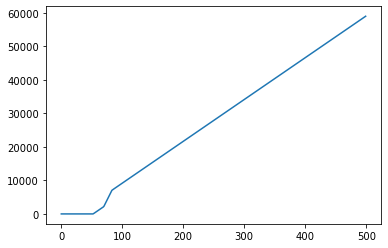

In [64]:
income_tax_new = calculate_everything(yearly_salary, deductions, social_rate, rates, brackets)

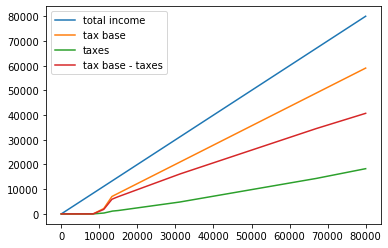

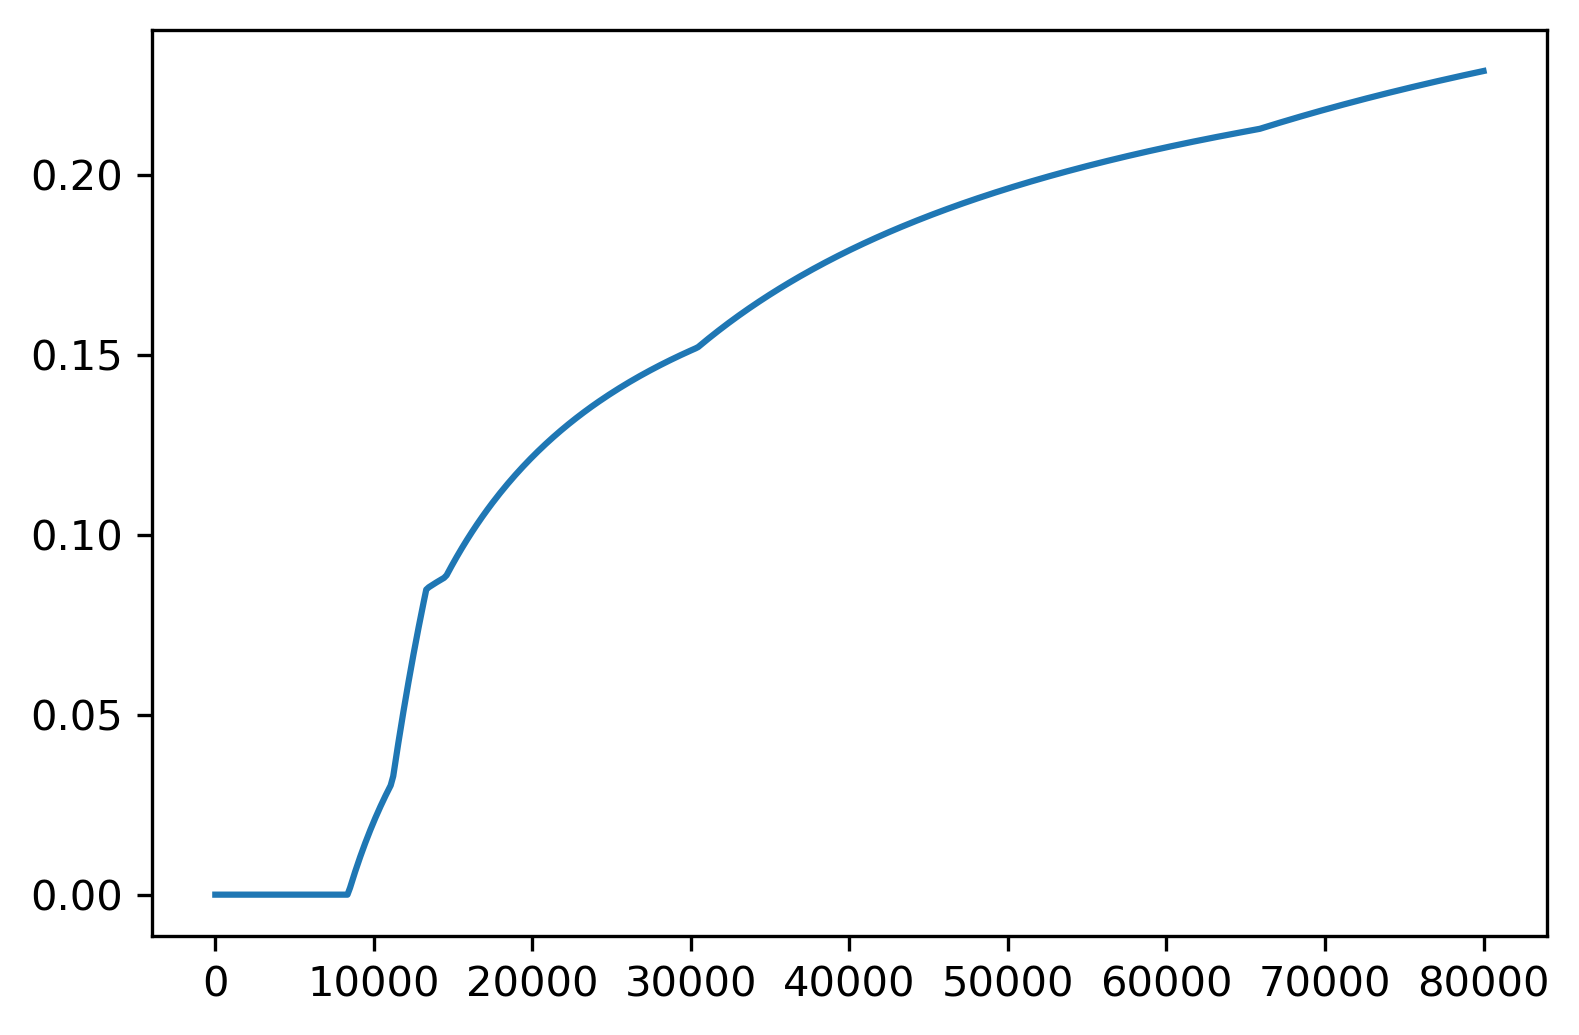

In [65]:
labels = ['total income', 'tax base', 'taxes', 'tax base - taxes']
for i in range(4):
    plt.plot(yearly_salary, income_tax_new[:, i], label=labels[i])
plt.legend(loc='best')

f, ax = plt.subplots(dpi=300)
ax.plot(yearly_salary, income_tax_new[:, 2] / yearly_salary)

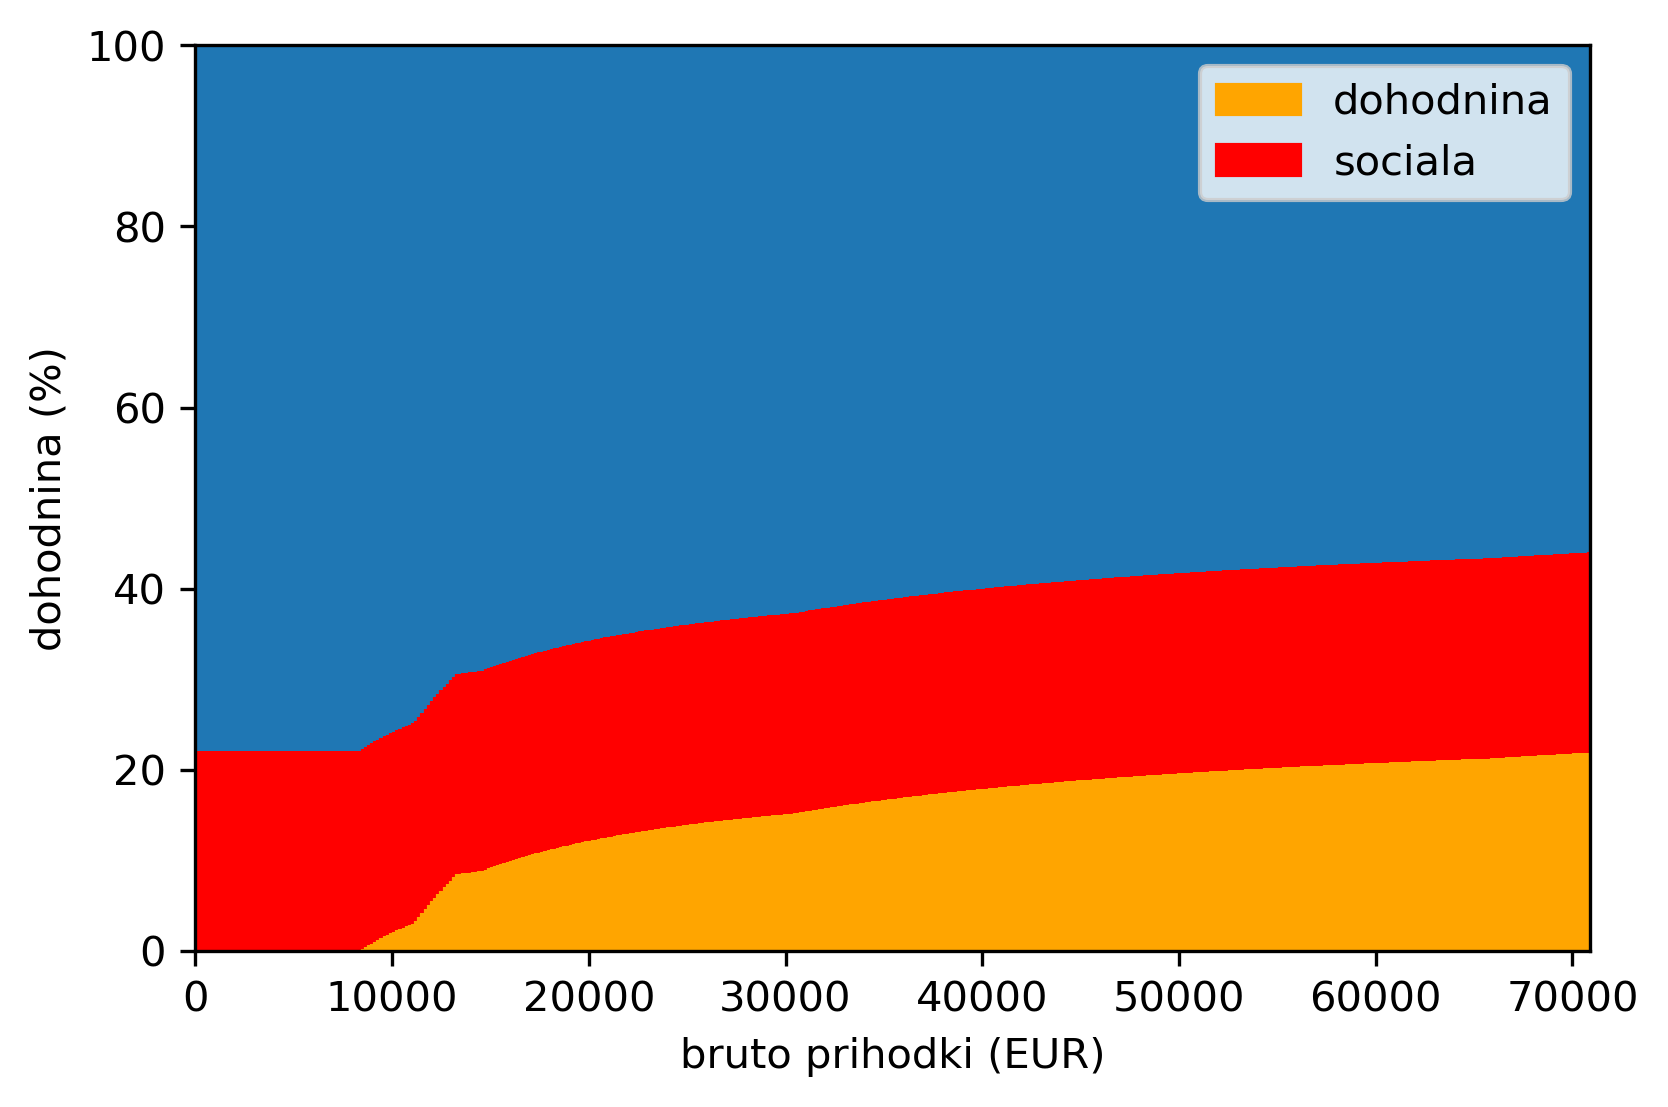

In [72]:
f, ax = plt.subplots(dpi=300)
x = yearly_salary
y = income_tax_new[:, 2] / yearly_salary * 100
ax.set_ylim(0, 100)
ax.set_xlim(0, 70907)
ax.set_xlabel('bruto prihodki (EUR)')
ax.set_ylabel('dohodnina (%)')
ax.fill_between(x, 0, 100)
for i, item in enumerate(y):
    label1 = ''
    label2 = ''
    if i == 0:
        label1 = 'dohodnina'
        label2 = 'sociala'
    ax.fill_between(x[i:i+1], 0, y[i], color='orange', label=label1)
    ax.fill_between(x[i:i+1], y[i], y[i]+22.1,color='red', label=label2)
ax.legend(loc='best')

In [117]:
# income_tax = dohodnina(yearly_salary, social_rate, brackets, deductions)
income_tax_new = calculate_everything(yearly_salary, deductions, social_rate, rates, brackets)
income_tax = income_tax_new
neto_salary = yearly_salary * (1 - social_rate) - income_tax
neto_salary_new = yearly_salary * (1 - social_rate) - income_tax_new

[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]
[6519.82]


ValueError: could not convert string to float: 'linear'

In [29]:
income_tax_new = calculate_everything(yearly_salary, deductions, social_rate, rates, brackets)
neto_salary_new = yearly_salary * (1 - social_rate) - income_tax_new

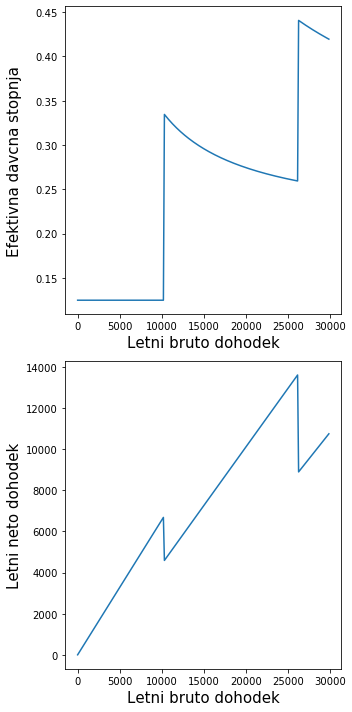

In [30]:
neto_salary = neto_salary_new
income_tax = income_tax_new
f, ax = plt.subplots(2, figsize=(5, 10))
ax[0].plot(yearly_salary, income_tax / yearly_salary)
ax[0].set_xlabel('Letni bruto dohodek', fontsize=15)
ax[0].set_ylabel('Efektivna davcna stopnja', fontsize=15)
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)

ax[1].plot(yearly_salary, neto_salary)
ax[1].set_xlabel('Letni bruto dohodek', fontsize=15)
ax[1].set_ylabel('Letni neto dohodek', fontsize=15)
xlim = (11000, 13200)
ylim = (8e3, 9050)
# ax[1].set_xlim(xlim)
# ax[1].set_ylim(ylim)

# border = np.diff(neto_salary)
# mask = border < 0
# for item in np.where(border < 0)[0]:
# #     print(item)
#     idx = np.argwhere(np.isclose(neto_salary, neto_salary[item]))
#     idx_1 = idx[0]
#     idx_2 = idx[-1]
#     ax[1].plot(yearly_salary[idx_1], neto_salary[idx_1], 'o', c='r')
#     ax[1].plot(yearly_salary[idx_2], neto_salary[idx_2], 'o', c='r')
#     temp_float = float(yearly_salary[idx_1])
#     ax[1].text(yearly_salary[idx_1] - 30, neto_salary[idx_1] + 30, '{:.0f}€'.format(temp_float),
#               fontsize=14)
#     temp_float = float(yearly_salary[idx_2])
#     ax[1].text(yearly_salary[idx_2] + 30, neto_salary[idx_2] - 20, '{:.0f}€'.format(temp_float),
#               fontsize=14)
f.align_ylabels()
f.tight_layout()

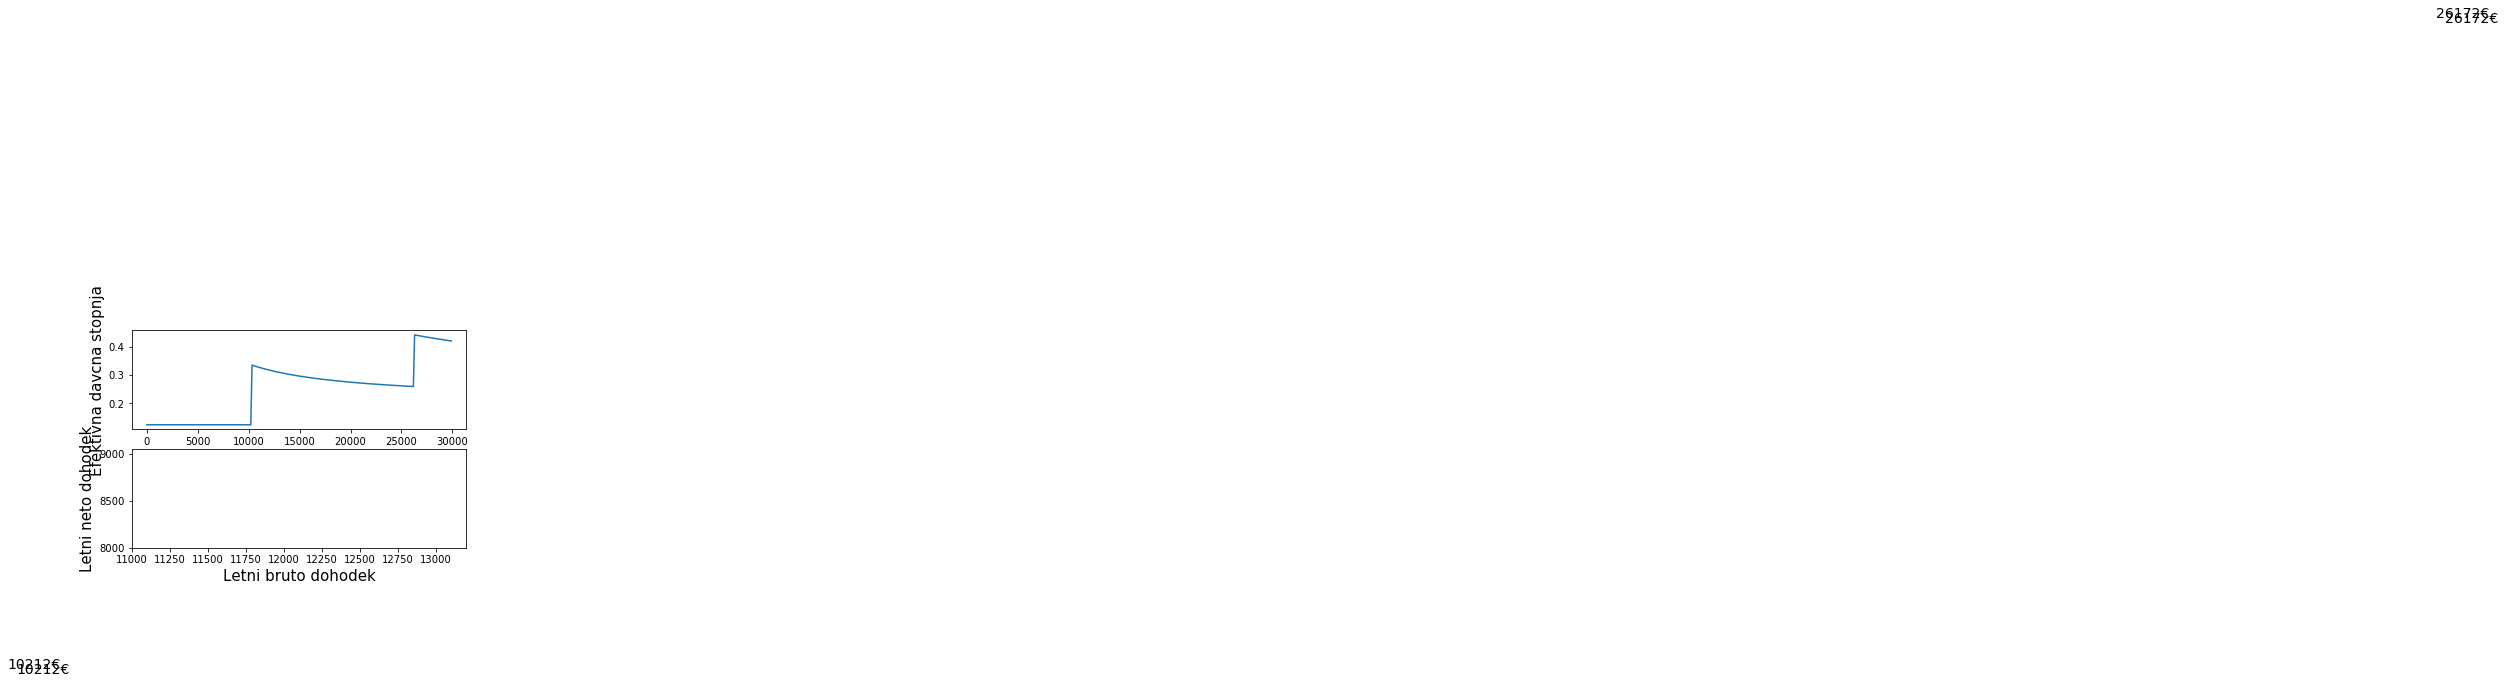

In [32]:
f, ax = plt.subplots(2)
ax[0].plot(yearly_salary, income_tax / yearly_salary)
ax[0].set_xlabel('Letni bruto dohodek', fontsize=15)
ax[0].set_ylabel('Efektivna davcna stopnja', fontsize=15)
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)

ax[1].plot(yearly_salary, neto_salary)
ax[1].set_xlabel('Letni bruto dohodek', fontsize=15)
ax[1].set_ylabel('Letni neto dohodek', fontsize=15)
xlim = (11000, 13200)
ylim = (8e3, 9050)
ax[1].set_xlim(xlim)
ax[1].set_ylim(ylim)

border = np.diff(neto_salary)
mask = border < 0
for item in np.where(border < 0)[0]:
#     print(item)
    idx = np.argwhere(np.isclose(neto_salary, neto_salary[item]))
    idx_1 = idx[0]
    idx_2 = idx[-1]
    ax[1].plot(yearly_salary[idx_1], neto_salary[idx_1], 'o', c='r')
    ax[1].plot(yearly_salary[idx_2], neto_salary[idx_2], 'o', c='r')
    temp_float = float(yearly_salary[idx_1])
    ax[1].text(yearly_salary[idx_1] - 30, neto_salary[idx_1] + 30, '{:.0f}€'.format(temp_float),
              fontsize=14)
    temp_float = float(yearly_salary[idx_2])
    ax[1].text(yearly_salary[idx_2] + 30, neto_salary[idx_2] - 20, '{:.0f}€'.format(temp_float),
              fontsize=14)

In [12]:
values = []
values.append((54949 - 9000) * (.42 - .14) / 2)
values.append( values[0] + (260532 - 54950) * .42 )
#values.append( np.sum(values) + (260532 - 54950) * .45 )


def german_taxes(x):
    if x > 260532:
        return values[-1] + (x - 260532) * .45
    if x > 54949:
        return values[0] + (x - 54949) * .42
    if x > 9000:
        return (x - 9000) * (.14 + (.42 - .14) * (x - 9000) / (54949 - 9000))
    return 0
    
        

/Users/Miha/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


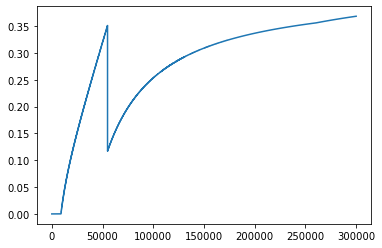

In [13]:
max_income = 300000
effective_tax_rate_de = np.arange(0, max_income)
for i, item in enumerate(effective_tax_rate_de):
    effective_tax_rate_de[i] = german_taxes(item)
    
plt.plot(np.arange(0, max_income), effective_tax_rate_de / np.arange(0, max_income))